In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# extraction of Json Files

In [5]:
import os

def is_file_not_empty(file_path):
    return os.path.isfile(file_path) and os.path.getsize(file_path) > 0

In [6]:
import pandas as pd
import numpy as np
import ast
def Retain_data(file_name):
    urls_retained = ast.literal_eval(pd.read_csv(file_name))
    # print(list(urls_retained))
    print(len(list(urls_retained)))
    return urls_retained

In [7]:
def Save_data(file_path,row):
    print(row)
    with open(file_path, 'a') as file:
        if not is_file_not_empty(file_path):
            file.write("Dataset_data\n")
        file.write(str(row) + '\n')
    

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import glob
import os
from sys import exit
from tqdm import tqdm

# Create output folder
output_dir = "g-images-real"
os.makedirs(output_dir, exist_ok=True)

img_counter = 1  # Only count successfully downloaded images
sub_img_counter = 1 # counts for sub images urls only (identifier to know which sub-images where chosen from the files)
real_sub_img_counter = 1 # counts for sub images urls only (identifier to know which sub-images where chosen from the files [real identifier])
try:
    files = os.listdir("D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/real")
    print(len(files))
    for folder in tqdm(files, desc="Processing Json files and image download progress"):
        print(folder)
        # sub_img_counter = 1
        # real_sub_img_counter = 1
        for file in glob.glob(f"D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/real/{folder}/*.json"):
            print(file)
            if len(file) == 0:
                continue
            # part 1 : converting the json file to pandas dataframe (uses batch concept more about that later)
            try:
                json_load = json2csv(file)
                
            except:
                data[-1][-1] = 1
                print(f"Error! Failed to process json file in {folder}")
                continue
            # part 2 : save image url to the output directory
            try:

                top_img_url = json_load['top_img'].strip()
                # with open(file, 'r', encoding='utf-8') as f:
                #     url = f.read().strip()
                if not top_img_url: # if top_img is corrupted thewn try another images urls and choose the first working one
                    secondary_img_url = json_load['images'][0].strip()
                    try:
                        cntr = 0 # first image in images index
                        stop = False
                        while(not stop):
                            if not secondary_img_url: # keep checking on urls to obainb the working one
                                cntr+=1
                                secondary_img_url = json_load['images'][cntr].strip()
                            else:
                                stop = True # this secondary url is working
                        url = secondary_img_url # setr url to the secondary one
                    except: # index out of range error, then all urls are corrupted
                        data[-1][-1] = 1
                        print(f"All image Urls in this article in: {folder} are corupted !")
                        continue
                else:
                    url = top_img_url
                
                response = requests.get(url, timeout=10)
                # Check if the response is actually an image
                if 'image' not in response.headers.get('Content-Type', ''):
                    # if url == top_img_url and cntr == 0:
                    #     secondary_img_url = json_load['images'][0].strip() # try again but with another image in images list
                    # elif url == secondary_img_url and cntr!= 0:
                    try:
                        # cntr2 = cntr
                        # cntr3 = 0
                        stop2 = False
                        stop3 = False
                        while(not stop3):
                            # if url == top_img_url and cntr == 0:
                            #     secondary_img_url = json_load['images'][0].strip() # try again but with another image in images list
                            # elif url == secondary_img_url and cntr!= 0:
                            if not stop2:
                                secondary_img_url = json_load['images'][cntr].strip() # try again but with another image in images list
                                # secondary_img_url = json_load['images'][cntr2].strip()
                                if not secondary_img_url:
                                    cntr+=1
                                    secondary_img_url = json_load['images'][cntr].strip()
                                else:
                                    stop2 = True
                            url = secondary_img_url
                            response = requests.get(url, timeout=10)
                            if 'image' not in response.headers.get('Content-Type', ''):
                                # cntr2+=1
                                stop2 = False
                                continue
                            else:
                                stop3 = True
                        url = secondary_img_url
                    except: # index out of range error, then all urls are corrupted
                        print(f"All image Urls in this article in: {folder} are corupted !")
                        print(f"Skipped non-image URL in {folder}")
                        data[-1][-1] = 1
                        continue
                
                img = Image.open(BytesIO(response.content)).convert("RGB")
                
                # Save image
                img.save(f"{output_dir}/image_{img_counter}_{real_sub_img_counter}_{sub_img_counter}.jpg")
                print(f"Saved image_{img_counter}_{real_sub_img_counter}_{sub_img_counter}.jpg")
                sub_img_counter += 1  # Only increment when save is successful
                real_sub_img_counter += 1 
    
            except Exception as e:
                print(f"Error with {file}: {e}")
                data[-1][-1] = 1
                real_sub_img_counter += 1
                
        img_counter += 1  # Increment the main counter for each file processed
except KeyboardInterrupt:
    Dataset = make_dataset()
    Dataset.to_csv("gossipcop-real_dataset_NC.csv")
    exit()

In [ ]:
# Gossipcop real

In [125]:
import requests
from PIL import Image
from io import BytesIO
import glob
import os
from sys import exit
from tqdm import tqdm
import time

data.clear()
columns.clear()
once = True

# Create output folder
output_dir = "g-images-real"
os.makedirs(output_dir, exist_ok=True)

# img_counter = 1  # Only count successfully downloaded images
# sub_img_counter = 1 # counts for sub images urls only (identifier to know which sub-images where chosen from the files)
# real_sub_img_counter = 1 # counts for sub images urls only (identifier to know which sub-images where chosen from the files [real identifier])

real_counter = 1
sub_img_counter = 0 # counts for sub images urls only (identifier to know which sub-images where chosen from the files)
cntr = 0
stop2 = False
stop3 = False

try:
    files = os.listdir("D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/real")
    print(len(files))
    for folder in files:
        print(folder)
        for file in glob.glob(f"D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/real/{folder}/*.json"):
            print(file)
            # time.sleep(3)
            if len(file) == 0:
                data[-1][-1] = 1
                continue
            # part 1 : converting the json file to pandas dataframe (uses batch concept more about that later)
            try:
                json_load = json2csv(file,folder_name=folder)
                
            except:
                print(f"Error! Failed to process json file in {folder}")
                data[-1][-1] = 1
                continue
            # part 2 : save image url to the output directory
            try:

                top_img_url = json_load['top_img'].strip()
                print(top_img_url)
                if not top_img_url: # if top_img is corrupted thewn try another images urls and choose the first working one
                    print("Here")
                    secondary_img_url = json_load['images'][0].strip()
                    try:
                        cntr = 0 # first image in images index
                        stop = False
                        while(not stop):
                            if not secondary_img_url: # keep checking on urls to obainb the working one
                                cntr+=1
                                secondary_img_url = json_load['images'][cntr].strip()
                            else:
                                stop = True # this secondary url is working
                        url = secondary_img_url # setr url to the secondary one
                    except: # index out of range error, then all urls are corrupted
                        data[-1][-1] = 1
                        print(f"All image Urls in this article in: {folder} are corupted !")
                        continue
                else:
                    url = top_img_url
                    print("OK")
                
                response = requests.get(url, timeout=10)
                # Check if the response is actually an image
                if 'image' not in response.headers.get('Content-Type', ''):
                    print("Yes")
                    try:
                        
                        while(not stop3):
                            if not stop2:
                                secondary_img_url = json_load['images'][cntr].strip() # try again but with another image in images list
                                if not secondary_img_url:
                                    cntr+=1
                                    secondary_img_url = json_load['images'][cntr].strip()
                                else:
                                    stop2 = True
                            url = secondary_img_url
                            response = requests.get(url, timeout=10)
                            if 'image' not in response.headers.get('Content-Type', ''):
                                stop2 = False
                                continue
                            else:
                                stop3 = True
                        url = secondary_img_url
                    except: # index out of range error, then all urls are corrupted
                        print(f"All image Urls in this article in: {folder} are corupted !")
                        print(f"Skipped non-image URL in {folder}")
                        data[-1][-1] = 1
                        continue
                
                img = Image.open(BytesIO(response.content)).convert("RGB")

                try:
                    if url == secondary_img_url:
    
                        sub_img_counter = cntr+1 
                except:
                    sub_img_counter = 0
                
                # Save image
                img.save(f"{output_dir}/{folder}_image_{real_counter}_{sub_img_counter}.jpg")
                print(f"Saved {folder}_image_{real_counter}_{sub_img_counter}.jpg")
                
                real_counter += 1 
    
            except Exception as e:
                print(f"Error with {file}: {e}")
                data[-1][-1] = 1
                
except KeyboardInterrupt:
    print("Safe Exitting ...")
    print("Saving the partial dataset ...")
    Dataset = make_dataset()
    Dataset.to_csv("gossipcop-real_dataset_NC.csv")
    exit()

print("Saving Dataset as 'Final_gossipcop-real_dataset' ...")
Dataset = make_dataset()
Dataset.to_csv("Final_gossipcop-real_dataset.csv")

16817
gossipcop-541230
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/real/gossipcop-541230\news content.json
url
text
images
top_img
keywords
authors
canonical_link
title
meta_data
movies
publish_date
source
summary
['ID', 'url', 'text', 'images', 'top_img', 'keywords', 'authors', 'canonical_link', 'title', 'meta_data', 'movies', 'publish_date', 'source', 'summary', 'Images_Error']
https://www.ocregister.com/wp-content/uploads/migration/o4x/o4xg44-b88660685z.120160331163106000g2kfjet5.10.jpg?w=1024&h=670
OK
Saved gossipcop-541230_image_1_0.jpg
gossipcop-561182
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/real/gossipcop-561182\news content.json
https://hips.hearstapps.com/hmg-prod/images/legacy-fre-image-placeholder-1638895372.png?crop=1.00xw:0.501xh;0.00102xw,0.256xh&resize=

C:\Users\Owner\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Saved gossipcop-567233_image_3_0.jpg
gossipcop-679264
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/real/gossipcop-679264\news content.json
https://ca-times.brightspotcdn.com/dims4/default/64e287b/2147483647/strip/true/crop/2400x1260+0+0/resize/1200x630!/quality/75/?url=https%3A%2F%2Fcalifornia-times-brightspot.s3.amazonaws.com%2Fdf%2F45%2F57d858144a2a88575fa2b03080bb%2Flatlogo-ss.jpg
OK
Saved gossipcop-679264_image_4_0.jpg
gossipcop-681826
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/real/gossipcop-681826\news content.json
https://www.hollywoodreporter.com/wp-content/uploads/2017/03/gettyimages-643057832_copy.jpg?w=1296&h=730&crop=1
OK
Saved gossipcop-681826_image_5_0.jpg
gossipcop-720665
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNe

C:\Users\Owner\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Saved gossipcop-847387_image_632_1.jpg
gossipcop-847388
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/real/gossipcop-847388\news content.json
https://wwd.com/wp-content/uploads/2017/05/rexfeatures_8772236ai.jpg?w=1000&h=563&crop=1
OK
Saved gossipcop-847388_image_633_1.jpg
gossipcop-847395
gossipcop-847399
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/real/gossipcop-847399\news content.json
https://i.dailymail.co.uk/i/pix/2017/05/04/02/3FEA9A8E00000578-0-image-a-34_1493859896360.jpg
OK
Saved gossipcop-847399_image_634_1.jpg
gossipcop-847406
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/real/gossipcop-847406\news content.json
https://hips.hearstapps.com/hmg-prod/images/hbz

ID                                                url  \
0      gossipcop-541230  https://www.ocregister.com/2016/03/31/lea-salo...   
1      gossipcop-561182  https://www.seventeen.com/celebrity/movies-tv/...   
2      gossipcop-567233  https://www.psychologytoday.com/us/blog/lesson...   
3      gossipcop-679264  https://www.latimes.com/local/california/la-me...   
4      gossipcop-681826  https://www.hollywoodreporter.com/thr-esq/jame...   
...                 ...                                                ...   
12914  gossipcop-956021  https://www.hollywoodreporter.com/heat-vision/...   
12915  gossipcop-956038  https://www.archyworldys.com/bad-blood-and-a-b...   
12916  gossipcop-956049  https://www.dailymail.co.uk/tvshowbiz/article-...   
12917  gossipcop-956070  https://www.usatoday.com/story/life/tv/2018/12...   
12918  gossipcop-956091  https://www.bustle.com/p/the-trailer-for-kesha...   

                                                    text  \
0      Born and raised in the Philippines, Lea Salong...   
1      We love all the Disney Princesses, but we're a...   
2      Source: Angela George/CC BY-SA 3.0\n\nOne of m...   
3      The boyfriend of Los Angeles police officer-tu...   
4      James Woods has received a letter that he can ...   
...                                                  ...   
12914  Chris Pratt and his fellow Guardians of the Ga...   
12915  This website uses cookies to improve your expe...   
12916  Robert Pattinson is rumored to be dating Suki ...   
12917  It's not easy to pull off marvelous a second t...   
12918  Kesha has had quite a year. Her third album, R...   

                                                  images  \
0      [https://www.ocregister.com/wp-content/themes/...   
1      [https://hips.hearstapps.com/hmg-prod/images/r...   
2      [https://cdn2.psychologytoday.com/assets/style...   
3      [https://ca-times.brightspotcdn.com/dims4/defa...   
4      [https://sb.scorecardresearch.com/p?c1=2&c2=60...   
...                                                  ...   
12914  [https://sb.scorecardresearch.com/p?c1=2&c2=60...   
12915  [https://soledaddemo.pencidesign.net/soledad-m...   
12916  [https://i.dailymail.co.uk/1s/2025/04/24/12/97...   
12917  [https://www.usatoday.com/gcdn/presto/2020/03/...   
12918  [https://pixel.quantserve.com/pixel/p-xPmcrFNG...   

                                                 top_img keywords  \
0      https://www.ocregister.com/wp-content/uploads/...       []   
1      https://hips.hearstapps.com/hmg-prod/images/le...       []   
2      https://cdn2.psychologytoday.com/assets/styles...       []   
3      https://ca-times.brightspotcdn.com/dims4/defau...       []   
4      https://www.hollywoodreporter.com/wp-content/u...       []   
...                                                  ...      ...   
12914  https://www.hollywoodreporter.com/wp-content/u...       []   
12915  https://soledaddemo.pencidesign.net/soledad-mo...       []   
12916  https://i.dailymail.co.uk/i/newpix/2018/07/30/...       []   
12917  https://www.usatoday.com/gcdn/presto/2018/12/0...       []   
12918  https://imgix.bustle.com/uploads/getty/2018/7/...       []   

                                                 authors  \
0                   [Jackie Moe, Orange County Register]   
1                                                     []   
2                                                     []   
3      [Staff Writer, Esmeralda Bermudez Writes Narra...   
4      [Eriq Gardner, .Wp-Block-Co-Authors-Plus-Coaut...   
...                                                  ...   
12914  [Aaron Couch, .Wp-Block-Co-Authors-Plus-Coauth...   
12915                                                 []   
12916                           [Dailymail.Com Reporter]   
12917                                                 []   
12918                                                 []   

                                          canonical_link  \
0      https://www.ocregister.co

In [ ]:
# Gossipcop fake

In [126]:
import requests
from PIL import Image
from io import BytesIO
import glob
import os
from sys import exit
from tqdm import tqdm
import time

data.clear()
columns.clear()
once = True

# Create output folder
output_dir = "f-images-real"
os.makedirs(output_dir, exist_ok=True)

# img_counter = 1  # Only count successfully downloaded images
# sub_img_counter = 1 # counts for sub images urls only (identifier to know which sub-images where chosen from the files)
# real_sub_img_counter = 1 # counts for sub images urls only (identifier to know which sub-images where chosen from the files [real identifier])

real_counter = 1
sub_img_counter = 0 # counts for sub images urls only (identifier to know which sub-images where chosen from the files)
cntr = 0
stop2 = False
stop3 = False

try:
    files = os.listdir("D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/fake")
    print(len(files))
    for folder in files:
        print(folder)
        for file in glob.glob(f"D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/fake/{folder}/*.json"):
            print(file)
            # time.sleep(3)
            if len(file) == 0:
                data[-1][-1] = 1
                continue
            # part 1 : converting the json file to pandas dataframe (uses batch concept more about that later)
            try:
                json_load = json2csv(file,folder_name=folder)
                
            except:
                print(f"Error! Failed to process json file in {folder}")
                data[-1][-1] = 1
                continue
            # part 2 : save image url to the output directory
            try:

                top_img_url = json_load['top_img'].strip()
                print(top_img_url)
                if not top_img_url: # if top_img is corrupted thewn try another images urls and choose the first working one
                    print("Here")
                    secondary_img_url = json_load['images'][0].strip()
                    try:
                        cntr = 0 # first image in images index
                        stop = False
                        while(not stop):
                            if not secondary_img_url: # keep checking on urls to obainb the working one
                                cntr+=1
                                secondary_img_url = json_load['images'][cntr].strip()
                            else:
                                stop = True # this secondary url is working
                        url = secondary_img_url # setr url to the secondary one
                    except: # index out of range error, then all urls are corrupted
                        data[-1][-1] = 1
                        print(f"All image Urls in this article in: {folder} are corupted !")
                        continue
                else:
                    url = top_img_url
                    print("OK")
                
                response = requests.get(url, timeout=10)
                # Check if the response is actually an image
                if 'image' not in response.headers.get('Content-Type', ''):
                    print("Yes")
                    try:
                        
                        while(not stop3):
                            if not stop2:
                                secondary_img_url = json_load['images'][cntr].strip() # try again but with another image in images list
                                if not secondary_img_url:
                                    cntr+=1
                                    secondary_img_url = json_load['images'][cntr].strip()
                                else:
                                    stop2 = True
                            url = secondary_img_url
                            response = requests.get(url, timeout=10)
                            if 'image' not in response.headers.get('Content-Type', ''):
                                stop2 = False
                                continue
                            else:
                                stop3 = True
                        url = secondary_img_url
                    except: # index out of range error, then all urls are corrupted
                        print(f"All image Urls in this article in: {folder} are corupted !")
                        print(f"Skipped non-image URL in {folder}")
                        data[-1][-1] = 1
                        continue
                
                img = Image.open(BytesIO(response.content)).convert("RGB")

                try:
                    if url == secondary_img_url:
    
                        sub_img_counter = cntr+1 
                except:
                    sub_img_counter = 0
                
                # Save image
                img.save(f"{output_dir}/{folder}_image_{real_counter}_{sub_img_counter}.jpg")
                print(f"Saved {folder}_image_{real_counter}_{sub_img_counter}.jpg")
                
                real_counter += 1 
    
            except Exception as e:
                print(f"Error with {file}: {e}")
                data[-1][-1] = 1
                
except KeyboardInterrupt:
    print("Safe Exitting ...")
    print("Saving the partial dataset ...")
    Dataset = make_dataset()
    Dataset.to_csv("gossipcop-fake_dataset.csv")
    exit()

print("Saving Dataset as 'Final_gossipcop-fake_dataset' ...")
Dataset = make_dataset()
Dataset.to_csv("Final_gossipcop-fake_dataset.csv")

5323
gossipcop-1000240645
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/fake/gossipcop-1000240645\news content.json
url
text
images
top_img
keywords
authors
canonical_link
title
meta_data
movies
publish_date
source
summary
['ID', 'url', 'text', 'images', 'top_img', 'keywords', 'authors', 'canonical_link', 'title', 'meta_data', 'movies', 'publish_date', 'source', 'summary', 'Images_Error']
https://api.photon.aremedia.net.au/wp-content/uploads/sites/17/2024/05/cropped-NewIdeaFavIcon.png?fit=32%2C32
OK
Saved gossipcop-1000240645_image_1_0.jpg
gossipcop-1000908841
gossipcop-1009248558
gossipcop-1012123555
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/fake/gossipcop-1012123555\news content.json
https://web.archive.org/web/20170427034444im_/https://pmchollywoodlife.files.wordpress.

C:\Users\Owner\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Saved gossipcop-1126220623_image_50_1.jpg
gossipcop-1126928115
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/fake/gossipcop-1126928115\news content.json
https://imgix.ranker.com/list_img_v2/8171/2548171/original/true-deep-undercover-cop-stories-u1?w=1200&h=630&fm=pjpg&q=80&fit=crop&dpr=1
OK
Saved gossipcop-1126928115_image_51_1.jpg
gossipcop-1127889925
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/fake/gossipcop-1127889925\news content.json
https://pyxis.nymag.com/v1/imgs/0d5/dd1/255d81baa4d70e5fba50d91ab5586b69e3-08-brad-angelina.1x.rsocial.w1200.jpg
OK
Saved gossipcop-1127889925_image_52_1.jpg
gossipcop-1131624656
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/fake/goss

ID                                                url  \
0     gossipcop-1000240645  http://www.newidea.com.au/woman-claims-to-be-p...   
1     gossipcop-1012123555  https://web.archive.org/web/20170427034444/htt...   
2     gossipcop-1014383679  http://www.x17online.com/2018/07/selena_gomez_...   
3     gossipcop-1014616559        http://en.wikipedia.org/wiki/Caitlyn_Jenner   
4     gossipcop-1020220396  http://www.tmz.com/2017/09/20/jessica-simpson-...   
...                    ...                                                ...   
3778  gossipcop-9983761608  http://radaronline.com/photos/jim-carrey-weigh...   
3779  gossipcop-9985800337  http://hollywoodlife.com/2018/06/14/is-caitlyn...   
3780  gossipcop-9993987206  http://www.yahoo.com/entertainment/margot-robb...   
3781  gossipcop-9994438576  http://www.inquisitr.com/4899991/katie-holmes-...   
3782  gossipcop-9997057215  http://okmagazine.com/photos/jennifer-garner-b...   

                                                   text  \
0     Star magazine has released an explosive report...   
1     SplashNews\n\nFor the first time since his inv...   
2     Those heels were cute, but they didn't last lo...   
3     American media personality and decathlete (bor...   
4     Play video content TMZ.com\n\nJessica Simpson ...   
...                                                 ...   
3778  Source: BACKGRID\n\nStick-thin Jim Carrey is w...   
3779  Will Caitlyn Jenner and her rumored girlfriend...   
3780  Margot Robbie is a married woman — that’s our ...   
3781  Katie Holmes is not pregnant with Jamie Foxx’s...   
3782  But that hasn't stopped Jen from wanting to fi...   

                                                 images  \
0     [https://api.photon.aremedia.net.au/wp-content...   
1     [https://web.archive.org/web/20170427034444im_...   
2     [http://pixel.quantserve.com/pixel/p-70R7d3i_Z...   
3     [http://upload.wikimedia.org/wikipedia/commons...   
4     [https://imagez.tmz.com/image/85/16by9/2025/04...   
...                                                 ...   
3778  [http://radaronline.com/search.svg, https://me...   
3779  [https://hollywoodlife.com/wp-content/uploads/...   
3780  [https://s.yimg.com/ny/api/res/1.2/AAva5Py5j7u...   
3781  [https://secure.gravatar.com/avatar/b04066548b...   
3782  [https://media.okmagazine.com/brand-img/brKOyK...   

                                                top_img keywords  \
0     https://api.photon.aremedia.net.au/wp-content/...       []   
1     https://web.archive.org/web/20170427034444im_/...       []   
2     http://www.x17online.com/media/images//2018/07...       []   
3     https://upload.wikimedia.org/wikipedia/commons...       []   
4     https://imagez.tmz.com/image/44/16by9/2017/09/...       []   
...                                                 ...      ...   
3778  https://media.radaronline.com/brand-img/Fc5VAD...       []   
3779  https://hollywoodlife.com/wp-content/uploads/2...       []   
3780  https://media.zenfs.com/creatr-images/GLB/2016...       []   
3781  https://www.inquisitr.com/wp-content/uploads/2...       []   
3782  https://media.okmagazine.com/brand-img/KX2jwYk...       []   

                                                authors  \
0     [Georgia Mars, Georgia Mars Is A Digital Conte...   
1                                  [Christopher Rogers]   
2                                                    []   
3                                                    []   
4                                                    []   
...                                                 ...   
3778         [Radar Staff, Aaron Johnson, Aaron Tinney]   
3779  [Tim Mcgovern, .Wp-Block-Co-Authors-Plus-Coaut...   
3780                                                 []   
3781                                      [News Writer]   
3782                                               [Ok]   

                                         canonical_link  \
0     https://www.newidea.com.au/celebrity/woman

In [ ]:
# Politifact real

624
politifact100
politifact1013
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/politifact/real/politifact1013\news content.json
url
text
images
top_img
keywords
authors
canonical_link
title
meta_data
movies
publish_date
source
summary
['ID', 'url', 'text', 'images', 'top_img', 'keywords', 'authors', 'canonical_link', 'title', 'meta_data', 'movies', 'publish_date', 'source', 'summary', 'Images_Error']
http://www.senate.gov/resources/images/us_sen.ico
OK
Saved politifact1013_image_1_0.jpg
politifact1014
politifact10185
politifact1019
politifact10209
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/politifact/real/politifact10209\news content.json

Here
Yes
cntr: 0
reached stop2
cntr: 1
All image Urls in this article in: politifact10209 are corupted !
Skipped non-image URL in politifact10209
politifac

c:\Users\Owner\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Saved politifact11855_image_27_2.jpg
politifact11882
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/politifact/real/politifact11882\news content.json
https://miro.medium.com/v2/5d8de952517e8160e40ef9841c781cdc14a5db313057fa3c3de41c6f5b494b19
OK
Saved politifact11882_image_28_2.jpg
politifact11899
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/politifact/real/politifact11899\news content.json
https://www.washingtonpost.com/wp-apps/imrs.php?src=http://img.washingtonpost.com/rf/image_908w/2010-2019/WashingtonPost/2016/02/12/National-Politics/Images/2016-02-12T024221Z_01_MIL508_RTRIDSP_3_USA-ELECTION-DEMOCRATS-4644.jpg&w=1440
OK
Error with D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/politifact/real/polit
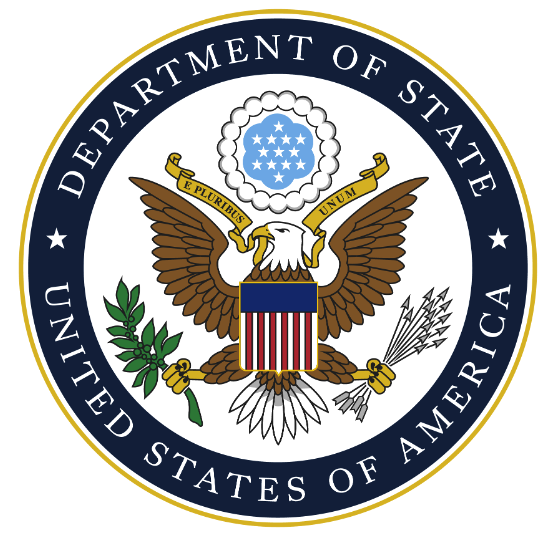

ID                                                url  \
0     politifact1013  http://www.senate.gov/legislative/LIS/roll_cal...   
1    politifact10209               http://pollingreport.com/CongJob.htm   
2     politifact1028  http://documents.nytimes.com/justice-departmen...   
3    politifact10348  http://www.eia.gov/cfapps/ipdbproject/IEDIndex...   
4    politifact10371  http://us3.campaign-archive1.com/?u=468d5dc433...   
..               ...                                                ...   
294     politifact98              http://nymag.com/news/features/34992/   
295   politifact9802  http://time.com/3111474/rand-paul-ferguson-pol...   
296    politifact986  http://www.nytimes.com/2008/09/21/business/21c...   
297    politifact997  http://www.defenselink.mil/pubs/pdfs/Measuring...   
298    politifact999  http://www.cdc.gov/flu/protect/habits.htm?s_ci...   

                                                  text  \
0    Roll Call Vote 111th Congress - 1st Session\n\...   
1    Follow @pollreport CONGRESS – Job Rating See a...   
2    Loading Justice Department Memos on Interrogat...   
3    Monthly and yearly energy forecasts, analysis ...   
4                                                        
..                                                 ...   
294  Photo: Preston Gannaway/Concord Monitor/Polari...   
295  The shooting of 18-year-old Michael Brown is a...   
296  WASHINGTON  The Bush administration on Saturd...   
297  Interactive Experience:\n\nTest Yourself on th...   
298                                                      

                                                images  \
0    [http://www.senate.gov/resources/images/senate...   
1          [http://pollingreport.com/images/logo3.gif]   
2                                                   []   
3    [http://www.eia.gov/favicon.ico, http://www.ei...   
4                                                   []   
..                                                 ...   
294  [https://pyxis.nymag.com/v1/imgs/0f1/6e9/1c0e2...   
295  [https://api.time.com/wp-content/uploads/2014/...   
296  [https://static01.nyt.com/newsgraphics/images/...   
297  [http://www.defenselink.mil/Portals/1/sealNati...   
298                                                 []   

                                               top_img keywords  \
0    http://www.senate.gov/resources/images/us_sen.ico       []   
1                                                            []   
2                                                            []   
3                       http://www.eia.gov/favicon.ico       []   
4                                                            []   
..                                                 ...      ...   
294  https://pyxis.nymag.com/v1/imgs/0f1/6e9/1c0e21...       []   
295  https://api.time.com/wp-content/uploads/2014/0...       []   
296  https://static01.nyt.com/newsgraphics/images/i...       []   
297  https://www.defense.gov/Portals/1/Images/home-...       []   
298                                                          []   

                    authors  \
0                        []   
1                        []   
2                        []   
3                        []   
4                        []   
..                      ...   
294                      []   
295        [Sen. Rand Paul]   
296  [David M. Herszenhorn]   
297                      []   
298                      []   

                                        canonical_link  \
0                                                        
1                                                        
2                                                        
3                                                        
4                                                        
..                                                 ...   
294             https://nymag.com/news/features/34992/   
295  https://time.com/3111474/rand-paul-ferguson-po...   
296  https://www.nytime

In [8]:
import requests
from PIL import Image
from io import BytesIO
import glob
import os
from sys import exit
from tqdm import tqdm
import time

data.clear()
columns.clear()
once = True

# Create output folder
output_dir = "p-images-real"
os.makedirs(output_dir, exist_ok=True)

# img_counter = 1  # Only count successfully downloaded images
# sub_img_counter = 1 # counts for sub images urls only (identifier to know which sub-images where chosen from the files)
# real_sub_img_counter = 1 # counts for sub images urls only (identifier to know which sub-images where chosen from the files [real identifier])

real_counter = 1
sub_img_counter = 0 # counts for sub images urls only (identifier to know which sub-images where chosen from the files)
cntr = 0
stop = False
stop2 = False
stop3 = False
notImage = False
try:
    files = os.listdir("D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/politifact/real")
    print(len(files))
    for folder in files:
        print(folder)
        for file in glob.glob(f"D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/politifact/real/{folder}/*.json"):
            print(file)
            # time.sleep(3)
            if len(file) == 0:
                data[-1][-1] = 1
                continue
            # part 1 : converting the json file to pandas dataframe (uses batch concept more about that later)
            try:
                json_load = json2csv(file,folder_name=folder)
                
            except:
                print(f"Error! Failed to process json file in {folder}")
                data[-1][-1] = 1
                continue
            # part 2 : save image url to the output directory
            try:

                top_img_url = json_load['top_img'].strip()
                print(top_img_url)
                if not top_img_url: # if top_img is corrupted thewn try another images urls and choose the first working one
                    print("Here")
                    secondary_img_url = json_load['images'][0].strip()
                    try:
                        cntr = 0 # first image in images index
                        stop = False
                        while(not stop):
                            if not secondary_img_url: # keep checking on urls to obainb the working one
                                cntr+=1
                                secondary_img_url = json_load['images'][cntr].strip()
                            else:
                                stop = True # this secondary url is working
                        url = secondary_img_url # setr url to the secondary one
                    except: # index out of range error, then all urls are corrupted
                        data[-1][-1] = 1
                        print(f"All image Urls in this article in: {folder} are corupted !")
                        continue
                else:
                    url = top_img_url
                    print("OK")
                
                response = requests.get(url, timeout=10)
                # Check if the response is actually an image
                if 'image' not in response.headers.get('Content-Type', ''):
                    print("Yes")
                    try:
                        stop2 = False
                        stop3 = False
                        while(not stop3):
                            if notImage:
                                cntr += 1
                                notImage = False
                            if not stop2:
                                print("cntr:",cntr)
                                secondary_img_url = json_load['images'][cntr].strip() # try again but with another image in images list
                                if not secondary_img_url:
                                    cntr+=1
                                    secondary_img_url = json_load['images'][cntr].strip()
                                else:
                                    print("reached stop2")
                                    stop2 = True
                            url = secondary_img_url
                            response = requests.get(url, timeout=20)
                            if 'image' not in response.headers.get('Content-Type', ''):
                                stop2 = False
                                notImage = True
                                continue
                            else:
                                print("reached stop3")
                                stop3 = True
                        url = secondary_img_url
                    except: # index out of range error, then all urls are corrupted
                        print(f"All image Urls in this article in: {folder} are corupted !")
                        print(f"Skipped non-image URL in {folder}")
                        data[-1][-1] = 1
                        continue
                
                img = Image.open(BytesIO(response.content)).convert("RGB")

                try:
                    if url == secondary_img_url:
    
                        sub_img_counter = cntr+1 
                except:
                    sub_img_counter = 0
                
                # Save image
                img.save(f"{output_dir}/{folder}_image_{real_counter}_{sub_img_counter}.jpg")
                print(f"Saved {folder}_image_{real_counter}_{sub_img_counter}.jpg")
                
                real_counter += 1 
    
            except Exception as e:
                print(f"Error with {file}: {e}")
                data[-1][-1] = 1
                
except KeyboardInterrupt:
    print("Safe Exitting ...")
    print("Saving the partial dataset ...")
    Dataset = make_dataset()
    Dataset.to_csv("politifact-real_dataset.csv")
    exit()

print("Saving Dataset as 'Final_politifact-real_dataset' ...")
Dataset = make_dataset()
Dataset.to_csv("Final_politifact-real_dataset.csv")

# Politifact Fake

In [9]:
import requests
from PIL import Image
from io import BytesIO
import glob
import os
from sys import exit
from tqdm import tqdm
import time

data.clear()
columns.clear()
once = True

# Create output folder
output_dir = "p-images-fake"
os.makedirs(output_dir, exist_ok=True)

# img_counter = 1  # Only count successfully downloaded images
# sub_img_counter = 1 # counts for sub images urls only (identifier to know which sub-images where chosen from the files)
# real_sub_img_counter = 1 # counts for sub images urls only (identifier to know which sub-images where chosen from the files [real identifier])

real_counter = 1
sub_img_counter = 0 # counts for sub images urls only (identifier to know which sub-images where chosen from the files)
cntr = 0
stop = False
stop2 = False
stop3 = False
notImage = False
try:
    files = os.listdir("D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/politifact/fake")
    print(len(files))
    for folder in files:
        print(folder)
        for file in glob.glob(f"D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/politifact/fake/{folder}/*.json"):
            print(file)
            # time.sleep(3)
            if len(file) == 0:
                data[-1][-1] = 1
                continue
            # part 1 : converting the json file to pandas dataframe (uses batch concept more about that later)
            try:
                json_load = json2csv(file,folder_name=folder)
                
            except:
                print(f"Error! Failed to process json file in {folder}")
                data[-1][-1] = 1
                continue
            # part 2 : save image url to the output directory
            try:

                top_img_url = json_load['top_img'].strip()
                print(top_img_url)
                if not top_img_url: # if top_img is corrupted thewn try another images urls and choose the first working one
                    print("Here")
                    secondary_img_url = json_load['images'][0].strip()
                    try:
                        cntr = 0 # first image in images index
                        stop = False
                        while(not stop):
                            if not secondary_img_url: # keep checking on urls to obainb the working one
                                cntr+=1
                                secondary_img_url = json_load['images'][cntr].strip()
                            else:
                                stop = True # this secondary url is working
                        url = secondary_img_url # setr url to the secondary one
                    except: # index out of range error, then all urls are corrupted
                        data[-1][-1] = 1
                        print(f"All image Urls in this article in: {folder} are corupted !")
                        continue
                else:
                    url = top_img_url
                    print("OK")
                
                response = requests.get(url, timeout=10)
                # Check if the response is actually an image
                if 'image' not in response.headers.get('Content-Type', ''):
                    print("Yes")
                    try:
                        stop2 = False
                        stop3 = False
                        while(not stop3):
                            if notImage:
                                cntr += 1
                                notImage = False
                            if not stop2:
                                print("cntr:",cntr)
                                secondary_img_url = json_load['images'][cntr].strip() # try again but with another image in images list
                                if not secondary_img_url:
                                    cntr+=1
                                    secondary_img_url = json_load['images'][cntr].strip()
                                else:
                                    print("reached stop2")
                                    stop2 = True
                            url = secondary_img_url
                            response = requests.get(url, timeout=20)
                            if 'image' not in response.headers.get('Content-Type', ''):
                                stop2 = False
                                notImage = True
                                continue
                            else:
                                print("reached stop3")
                                stop3 = True
                        url = secondary_img_url
                    except: # index out of range error, then all urls are corrupted
                        print(f"All image Urls in this article in: {folder} are corupted !")
                        print(f"Skipped non-image URL in {folder}")
                        data[-1][-1] = 1
                        continue
                
                img = Image.open(BytesIO(response.content)).convert("RGB")

                try:
                    if url == secondary_img_url:
    
                        sub_img_counter = cntr+1 
                except:
                    sub_img_counter = 0
                
                # Save image
                img.save(f"{output_dir}/{folder}_image_{real_counter}_{sub_img_counter}.jpg")
                print(f"Saved {folder}_image_{real_counter}_{sub_img_counter}.jpg")
                
                real_counter += 1 
    
            except Exception as e:
                print(f"Error with {file}: {e}")
                data[-1][-1] = 1
                
except KeyboardInterrupt:
    print("Safe Exitting ...")
    print("Saving the partial dataset ...")
    Dataset = make_dataset()
    Dataset.to_csv("politifact-fake_dataset.csv")
    exit()

print("Saving Dataset as 'Final_politifact-fake_dataset' ...")
Dataset = make_dataset()
Dataset.to_csv("Final_politifact-fake_dataset.csv")

432
politifact11773
politifact13038
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/politifact/fake/politifact13038\news content.json
url
text
images
top_img
keywords
authors
canonical_link
title
meta_data
movies
publish_date
source
summary
['ID', 'url', 'text', 'images', 'top_img', 'keywords', 'authors', 'canonical_link', 'title', 'meta_data', 'movies', 'publish_date', 'source', 'summary', 'Images_Error']
https://scontent.fcai19-7.fna.fbcdn.net/v/t39.30808-6/464750120_10079939502099013_1172569180519075571_n.jpg?stp=dst-jpg_s851x315_tt6&_nc_cat=110&ccb=1-7&_nc_sid=305a04&_nc_ohc=L5SmS098juUQ7kNvwHFoYrY&_nc_oc=AdnyuHffWmTLt8MmffPkyN8DoCE-f65tgXGwFLPLnenormrf-pchgWUZHOTCnRm7hUw&_nc_zt=23&_nc_ht=scontent.fcai19-7.fna&_nc_gid=yiG4W_OZMAkDNubtA5OlYg&oh=00_AfE-y2RM8-fj-VriEvC4B4B62ZZojasDHfGWEIBzhJt09g&oe=680FFD2F
OK
Yes
cntr: 0
reached stop2
cntr: 1
All image Urls in this article in: politifact130

c:\Users\Owner\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


https://nypost.com/wp-content/uploads/sites/2/2017/10/vegas_shooting_victims.jpg?quality=75&strip=all&w=1024
OK
Saved politifact14605_image_80_14.jpg
politifact14620
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/politifact/fake/politifact14620\news content.json
http://static.trendolizer.com/img/apple-touch-icon-114x114-precomposed.png
OK
Yes
cntr: 13
reached stop2
reached stop3
Saved politifact14620_image_81_14.jpg
politifact14621
D:/Daily used/3rd uni/2nd sem/AIS302 Artificial Neural Networks-LECT-01/Project/FakeNewsNet-master/FakeNewsNet-master/code/fakenewsnet_dataset/politifact/fake/politifact14621\news content.json
http://observeronline.news/wp-content/uploads/2017/10/eoeoeoeoeoeo.jpg
OK
Yes
cntr: 13
All image Urls in this article in: politifact14621 are corupted !
Skipped non-image URL in politifact14621
politifact14624
politifact14643
politifact14644
politifact14664
D:/Daily used/3rd

ID                                                url  \
0    politifact13038  https://www.facebook.com/OccupyDemocrats/photo...   
1    politifact13468  http://www.bbc.com/news/election-us-2016-37987...   
2    politifact13475  http://genius.com/discussions/219349-Donald-tr...   
3    politifact13484  https://www.washingtonpost.com/graphics/politi...   
4    politifact13496  http://www.theverge.com/2016/11/25/13748226/cn...   
..               ...                                                ...   
205  politifact15604    http://www.worldfactsftw.com/nasa-will-pay-you/   
206  politifact15606  https://thegoldwater.com/news/30915-Clinton-Bo...   
207  politifact15616  http://www.neonnettle.com/news/4514-british-po...   
208  politifact15625  https://yournewswire.com/puerto-rico-mayor-fra...   
209  politifact15631  https://yournewswire.com/lisa-page-squeals-dnc...   

                                                  text  \
0                                                        
1    A fabricated news story claiming Hollywood act...   
2    Genius Nickname\n\nEmail\n\nPassword\n\nBy cli...   
3    Getting ballot access can be hard for smaller ...   
4    Last night, a twitter account by the name of @...   
..                                                 ...   
205  In the vibrant world of online casinos, RTP li...   
206  Photo credit: infowars.com\n\nNew Jersey coupl...   
207                                                      
208  Sports\n\nGET $750 IN BONUS FUNDS ON YOUR FIRS...   
209  Sports\n\nGET $750 IN BONUS FUNDS ON YOUR FIRS...   

                                                images  \
0    [https://scontent.fcai19-7.fna.fbcdn.net/v/t39...   
1    [https://ichef.bbci.co.uk/ace/standard/976/cps...   
2    [https://assets.genius.com/favicon.ico?1745437...   
3    [https://www.washingtonpost.com/graphics/polit...   
4    [https://platform.theverge.com/wp-content/uplo...   
..                                                 ...   
205  [https://i.imgur.com/G6188CO.jpeg, https://i.i...   
206  [https://thegoldwater.com/static/public/icons/...   
207  [https://neonnettle.com/wp-content/uploads/202...   
208  [https://yournewswire.com/wp-content/uploads/2...   
209  [https://yournewswire.com/wp-content/uploads/2...   

                                               top_img keywords  \
0    https://scontent.fcai19-7.fna.fbcdn.net/v/t39....       []   
1    https://ichef.bbci.co.uk/ace/branded_news/1200...       []   
2     https://assets.genius.com/favicon.ico?1745437001       []   
3    https://www.washingtonpost.com/graphics/politi...       []   
4    https://platform.theverge.com/wp-content/uploa...       []   
..                                                 ...      ...   
205                   https://i.imgur.com/G6188CO.jpeg       []   
206  https://thegoldwater.com/static/media_thumb/7f...       []   
207  https://neonnettle.com/wp-content/uploads/2025...       []   
208  https://yournewswire.com/wp-content/uploads/20...       []   
209  https://yournewswire.com/wp-content/uploads/20...       []   

                          authors  \
0                              []   
1                              []   
2                              []   
3    [Denise Lu, Kevin Uhrmacher]   
4                   [Loren Grush]   
..                            ...   
205                            []   
206                            []   
207                            []   
208                            []   
209                            []   

                                        canonical_link  \
0    https://www.facebook.com/photo/?fbid=121578717...   
1    https://www.bbc.com/news/election-us-2016-3798...   
2                                                        
3    https://www.washingtonpost.com/graphics/politi...   
4    https://www.theverge.com/2016/11/25/13748226/c...   
..                                                 ...   
205                         https://worldfactsftw.com/   
206  http

In [3]:
import pandas as pd
import json
columns = []
data = []
once = True

def json2csv(JSON_FILE,folder_name):
    global columns
    global data
    global once
    
    dataset_row = [] # make one large list that will hold lists of json data
    
    with open(f"{JSON_FILE}", 'r', encoding='utf-8') as json_file:
        json_load = json.load(json_file)
        
    if once:
        columns.append("ID")
        for file in json_load:
            print(file)
            columns.append(file)
        columns.append("Images_Error")
        print(columns)
        once = False

    dataset_row.append(folder_name)
    for col in columns[1:-1]:
        dataset_row.append(json_load[col])
        
    dataset_row.append(0) # default value for error
    data.append(dataset_row)
    return json_load

In [4]:
def make_dataset():
    global columns
    global data
    # table_dict = dict(zip(columns,data))
    # print(table_dict)
    
    # Dataset = pd.DataFrame(table_dict)
    Dataset = pd.DataFrame(data=data , columns=columns)
    display(Dataset)
    return Dataset

# Image Augmentation

In [2]:
# Image Classification
import torch
from torchvision.transforms import v2

In [44]:
transforms = v2.Compose([
    v2.Resize(size=(224, 224), antialias=True),
    # v2.RandomResizedCrop(size=(224, 224), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ColorJitter(brightness=.5, contrast=.2, saturation=.2),
    # v2.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.)),
    v2.RandomAdjustSharpness(sharpness_factor=.2),
    # v2.JPEG((5, 50)),
    v2.ToImage(),  # Convert to tensor, only needed if you had a PIL image
    # v2.ToDtype(torch.float32, scale=True),  # Normalize expects float input,
    # v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # Normalization will be done later right before training the model to makesaved images visually interpreetable
])

In [45]:
torch.manual_seed(1)

In [46]:
import os
from PIL import Image
import torchvision.transforms as T
import torchvision.transforms.functional as F

dir = "g-images-fake"

# define a transform to convert a tensor to PIL image
transform = T.ToPILImage()

for img in os.listdir(dir):
    
    img_path = os.path.join(dir, img)
    print(img_path)
    image = Image.open(img_path).convert("RGB")
    image = transforms(image)
    # image = image.unsqueeze(0)
    print(image.shape)
    image = F.to_pil_image(image)
    # image = transform(image)
    if os.path.exists(os.path.join(f"AUG-{dir}", img)):
        image.save(os.path.join(f"AUG-{dir}", img)) 
    else:
        os.makedirs(os.path.join(f"AUG-{dir}"), exist_ok=True)
        image.save(os.path.join(f"AUG-{dir}", img))

g-images-fake\gossipcop-1000240645_image_1_0.jpg
torch.Size([3, 224, 224])
g-images-fake\gossipcop-1014383679_image_2_0.jpg
torch.Size([3, 224, 224])
g-images-fake\gossipcop-1014616559_image_3_0.jpg
torch.Size([3, 224, 224])
g-images-fake\gossipcop-1020220396_image_4_0.jpg
torch.Size([3, 224, 224])
g-images-fake\gossipcop-1020335052_image_5_0.jpg
torch.Size([3, 224, 224])
g-images-fake\gossipcop-1023576750_image_6_0.jpg
torch.Size([3, 224, 224])
g-images-fake\gossipcop-1026793571_image_7_0.jpg
torch.Size([3, 224, 224])
g-images-fake\gossipcop-1031800447_image_8_0.jpg
torch.Size([3, 224, 224])
g-images-fake\gossipcop-1032468824_image_9_0.jpg
torch.Size([3, 224, 224])
g-images-fake\gossipcop-1032664975_image_10_0.jpg
torch.Size([3, 224, 224])
g-images-fake\gossipcop-1036415470_image_11_0.jpg
torch.Size([3, 224, 224])
g-images-fake\gossipcop-1037841505_image_12_0.jpg
torch.Size([3, 224, 224])
g-images-fake\gossipcop-1042406339_image_13_0.jpg
torch.Size([3, 224, 224])
g-images-fake\gossipc

# Dataset Merging

In [ ]:
import pandas as pd

gr = pd.read_csv("Final_gossipcop-real_dataset.csv")
gf = pd.read_csv("Final_gossipcop-fake_dataset.csv")

pr = pd.read_csv("Final_politifact-real_dataset.csv")
pf = pd.read_csv("Final_politifact-fake_dataset.csv")

In [4]:
gr.shape

(12919, 16)

In [5]:
gf.shape

(3783, 16)

In [7]:
12919 + 3783

16702

In [8]:
frames = [gr, gf]

Finalized_GossipCop_Merged = pd.concat(frames)

Finalized_GossipCop_Merged

Unnamed: 0                    ID  \
0              0      gossipcop-541230   
1              1      gossipcop-561182   
2              2      gossipcop-567233   
3              3      gossipcop-679264   
4              4      gossipcop-681826   
...          ...                   ...   
3778        3778  gossipcop-9983761608   
3779        3779  gossipcop-9985800337   
3780        3780  gossipcop-9993987206   
3781        3781  gossipcop-9994438576   
3782        3782  gossipcop-9997057215   

                                                    url  \
0     https://www.ocregister.com/2016/03/31/lea-salo...   
1     https://www.seventeen.com/celebrity/movies-tv/...   
2     https://www.psychologytoday.com/us/blog/lesson...   
3     https://www.latimes.com/local/california/la-me...   
4     https://www.hollywoodreporter.com/thr-esq/jame...   
...                                                 ...   
3778  http://radaronline.com/photos/jim-carrey-weigh...   
3779  http://hollywoodlife.com/2018/06/14/is-caitlyn...   
3780  http://www.yahoo.com/entertainment/margot-robb...   
3781  http://www.inquisitr.com/4899991/katie-holmes-...   
3782  http://okmagazine.com/photos/jennifer-garner-b...   

                                                   text  \
0     Born and raised in the Philippines, Lea Salong...   
1     We love all the Disney Princesses, but we're a...   
2     Source: Angela George/CC BY-SA 3.0\n\nOne of m...   
3     The boyfriend of Los Angeles police officer-tu...   
4     James Woods has received a letter that he can ...   
...                                                 ...   
3778  Source: BACKGRID\n\nStick-thin Jim Carrey is w...   
3779  Will Caitlyn Jenner and her rumored girlfriend...   
3780  Margot Robbie is a married woman — that’s our ...   
3781  Katie Holmes is not pregnant with Jamie Foxx’s...   
3782  But that hasn't stopped Jen from wanting to fi...   

                                                 images  \
0     ['https://www.ocregister.com/wp-content/themes...   
1     ['https://hips.hearstapps.com/hmg-prod/images/...   
2     ['https://cdn2.psychologytoday.com/assets/styl...   
3     ['https://ca-times.brightspotcdn.com/dims4/def...   
4     ['https://sb.scorecardresearch.com/p?c1=2&c2=6...   
...                                                 ...   
3778  ['http://radaronline.com/search.svg', 'https:/...   
3779  ['https://hollywoodlife.com/wp-content/uploads...   
3780  ['https://s.yimg.com/ny/api/res/1.2/AAva5Py5j7...   
3781  ['https://secure.gravatar.com/avatar/b04066548...   
3782  ['https://media.okmagazine.com/brand-img/brKOy...   

                                                top_img keywords  \
0     https://www.ocregister.com/wp-content/uploads/...       []   
1     https://hips.hearstapps.com/hmg-prod/images/le...       []   
2     https://cdn2.psychologytoday.com/assets/styles...       []   
3     https://ca-times.brightspotcdn.com/dims4/defau...       []   
4     https://www.hollywoodreporter.com/wp-content/u...       []   
...                                                 ...      ...   
3778  https://media.radaronline.com/brand-img/Fc5VAD...       []   
3779  https://hollywoodlife.com/wp-content/uploads/2...       []   
3780  https://media.zenfs.com/creatr-images/GLB/2016...       []   
3781  https://www.inquisitr.com/wp-content/uploads/2...       []   
3782  https://media.okmagazine.com/brand-img/KX2jwYk...       []   

                                                authors  \
0              ['Jackie Moe', 'Orange County Register']   
1                                                    []   
2                                                    []   
3     ['Staff Writer', 'Esmeralda Bermudez Writes Na...   
4     ['Eriq Gardner', '.Wp-Block-Co-Authors-Plus-Co...   
...                                                 ...   
3778   ['Radar Staff', 'Aaron Johnson', 'Aaron Tinney']   
3779  ['Tim Mcgovern', '.Wp-Block-Co-Authors-Plus-Co...   
3780                      

In [10]:
pr.shape

(299, 16)

In [11]:
pf.shape

(210, 16)

In [9]:
frames = [pr, pf]

Finalized_Politifact_Merged = pd.concat(frames)

Finalized_Politifact_Merged

Unnamed: 0               ID  \
0             0   politifact1013   
1             1  politifact10209   
2             2   politifact1028   
3             3  politifact10348   
4             4  politifact10371   
..          ...              ...   
205         205  politifact15604   
206         206  politifact15606   
207         207  politifact15616   
208         208  politifact15625   
209         209  politifact15631   

                                                   url  \
0    http://www.senate.gov/legislative/LIS/roll_cal...   
1                 http://pollingreport.com/CongJob.htm   
2    http://documents.nytimes.com/justice-departmen...   
3    http://www.eia.gov/cfapps/ipdbproject/IEDIndex...   
4    http://us3.campaign-archive1.com/?u=468d5dc433...   
..                                                 ...   
205    http://www.worldfactsftw.com/nasa-will-pay-you/   
206  https://thegoldwater.com/news/30915-Clinton-Bo...   
207  http://www.neonnettle.com/news/4514-british-po...   
208  https://yournewswire.com/puerto-rico-mayor-fra...   
209  https://yournewswire.com/lisa-page-squeals-dnc...   

                                                  text  \
0    Roll Call Vote 111th Congress - 1st Session\n\...   
1    Follow @pollreport CONGRESS – Job Rating See a...   
2    Loading Justice Department Memos on Interrogat...   
3    Monthly and yearly energy forecasts, analysis ...   
4                                                  NaN   
..                                                 ...   
205  In the vibrant world of online casinos, RTP li...   
206  Photo credit: infowars.com\n\nNew Jersey coupl...   
207                                                NaN   
208  Sports\n\nGET $750 IN BONUS FUNDS ON YOUR FIRS...   
209  Sports\n\nGET $750 IN BONUS FUNDS ON YOUR FIRS...   

                                                images  \
0    ['http://www.senate.gov/resources/images/senat...   
1        ['http://pollingreport.com/images/logo3.gif']   
2                                                   []   
3    ['http://www.eia.gov/favicon.ico', 'http://www...   
4                                                   []   
..                                                 ...   
205  ['https://i.imgur.com/G6188CO.jpeg', 'https://...   
206  ['https://thegoldwater.com/static/public/icons...   
207  ['https://neonnettle.com/wp-content/uploads/20...   
208  ['https://yournewswire.com/wp-content/uploads/...   
209  ['https://yournewswire.com/wp-content/uploads/...   

                                               top_img keywords authors  \
0    http://www.senate.gov/resources/images/us_sen.ico       []      []   
1                                                  NaN       []      []   
2                                                  NaN       []      []   
3                       http://www.eia.gov/favicon.ico       []      []   
4                                                  NaN       []      []   
..                                                 ...      ...     ...   
205                   https://i.imgur.com/G6188CO.jpeg       []      []   
206  https://thegoldwater.com/static/media_thumb/7f...       []      []   
207  https://neonnettle.com/wp-content/uploads/2025...       []      []   
208  https://yournewswire.com/wp-content/uploads/20...       []      []   
209  https://yournewswire.com/wp-content/uploads/20...       []      []   

                                        canonical_link  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
205                         https://worldfactsftw.com/   
206  https://thegoldwater.com/news/30915-Clinton-Bo...   
207                            https://neonnettle.com/   


In [12]:
Finalized_Politifact_Merged.to_csv("Finalized_Politifact_Merged.csv", index=False)
Finalized_GossipCop_Merged.to_csv("Finalized_GossipCop_Merged.csv", index=False)

In [12]:
G = pd.read_csv("Finalized_GossipCop_Merged.csv")
G

Unnamed: 0                    ID  \
0               0      gossipcop-541230   
1               1      gossipcop-561182   
2               2      gossipcop-567233   
3               3      gossipcop-679264   
4               4      gossipcop-681826   
...           ...                   ...   
16697        3778  gossipcop-9983761608   
16698        3779  gossipcop-9985800337   
16699        3780  gossipcop-9993987206   
16700        3781  gossipcop-9994438576   
16701        3782  gossipcop-9997057215   

                                                     url  \
0      https://www.ocregister.com/2016/03/31/lea-salo...   
1      https://www.seventeen.com/celebrity/movies-tv/...   
2      https://www.psychologytoday.com/us/blog/lesson...   
3      https://www.latimes.com/local/california/la-me...   
4      https://www.hollywoodreporter.com/thr-esq/jame...   
...                                                  ...   
16697  http://radaronline.com/photos/jim-carrey-weigh...   
16698  http://hollywoodlife.com/2018/06/14/is-caitlyn...   
16699  http://www.yahoo.com/entertainment/margot-robb...   
16700  http://www.inquisitr.com/4899991/katie-holmes-...   
16701  http://okmagazine.com/photos/jennifer-garner-b...   

                                                    text  \
0      Born and raised in the Philippines, Lea Salong...   
1      We love all the Disney Princesses, but we're a...   
2      Source: Angela George/CC BY-SA 3.0\n\nOne of m...   
3      The boyfriend of Los Angeles police officer-tu...   
4      James Woods has received a letter that he can ...   
...                                                  ...   
16697  Source: BACKGRID\n\nStick-thin Jim Carrey is w...   
16698  Will Caitlyn Jenner and her rumored girlfriend...   
16699  Margot Robbie is a married woman — that’s our ...   
16700  Katie Holmes is not pregnant with Jamie Foxx’s...   
16701  But that hasn't stopped Jen from wanting to fi...   

                                                  images  \
0      ['https://www.ocregister.com/wp-content/themes...   
1      ['https://hips.hearstapps.com/hmg-prod/images/...   
2      ['https://cdn2.psychologytoday.com/assets/styl...   
3      ['https://ca-times.brightspotcdn.com/dims4/def...   
4      ['https://sb.scorecardresearch.com/p?c1=2&c2=6...   
...                                                  ...   
16697  ['http://radaronline.com/search.svg', 'https:/...   
16698  ['https://hollywoodlife.com/wp-content/uploads...   
16699  ['https://s.yimg.com/ny/api/res/1.2/AAva5Py5j7...   
16700  ['https://secure.gravatar.com/avatar/b04066548...   
16701  ['https://media.okmagazine.com/brand-img/brKOy...   

                                                 top_img keywords  \
0      https://www.ocregister.com/wp-content/uploads/...       []   
1      https://hips.hearstapps.com/hmg-prod/images/le...       []   
2      https://cdn2.psychologytoday.com/assets/styles...       []   
3      https://ca-times.brightspotcdn.com/dims4/defau...       []   
4      https://www.hollywoodreporter.com/wp-content/u...       []   
...                                                  ...      ...   
16697  https://media.radaronline.com/brand-img/Fc5VAD...       []   
16698  https://hollywoodlife.com/wp-content/uploads/2...       []   
16699  https://media.zenfs.com/creatr-images/GLB/2016...       []   
16700  https://www.inquisitr.com/wp-content/uploads/2...       []   
16701  https://media.okmagazine.com/brand-img/KX2jwYk...       []   

                                                 authors  \
0               ['Jackie Moe', 'Orange County Register']   
1                                                     []   
2                                                     []   
3      ['Staff Writer', 'Esmeralda Bermudez Writes Na...   
4      ['Eriq Gardner', '.Wp-Block-Co-Authors-Plus-Co...   
...                                                  ...   
16697   ['Radar Staff', 'Aaron Johnson', 'Aaron Tinney']   
16698  ['Tim Mcgov

In [15]:
WG = G[G.Images_Error == 0]
WG

Unnamed: 0                    ID  \
0               0      gossipcop-541230   
1               1      gossipcop-561182   
2               2      gossipcop-567233   
3               3      gossipcop-679264   
4               4      gossipcop-681826   
...           ...                   ...   
16696        3777  gossipcop-9983683681   
16697        3778  gossipcop-9983761608   
16698        3779  gossipcop-9985800337   
16700        3781  gossipcop-9994438576   
16701        3782  gossipcop-9997057215   

                                                     url  \
0      https://www.ocregister.com/2016/03/31/lea-salo...   
1      https://www.seventeen.com/celebrity/movies-tv/...   
2      https://www.psychologytoday.com/us/blog/lesson...   
3      https://www.latimes.com/local/california/la-me...   
4      https://www.hollywoodreporter.com/thr-esq/jame...   
...                                                  ...   
16696  http://people.com/tv/kylie-jenner-and-travis-s...   
16697  http://radaronline.com/photos/jim-carrey-weigh...   
16698  http://hollywoodlife.com/2018/06/14/is-caitlyn...   
16700  http://www.inquisitr.com/4899991/katie-holmes-...   
16701  http://okmagazine.com/photos/jennifer-garner-b...   

                                                    text  \
0      Born and raised in the Philippines, Lea Salong...   
1      We love all the Disney Princesses, but we're a...   
2      Source: Angela George/CC BY-SA 3.0\n\nOne of m...   
3      The boyfriend of Los Angeles police officer-tu...   
4      James Woods has received a letter that he can ...   
...                                                  ...   
16696  Kylie Jenner and Travis Scott were first spott...   
16697  Source: BACKGRID\n\nStick-thin Jim Carrey is w...   
16698  Will Caitlyn Jenner and her rumored girlfriend...   
16700  Katie Holmes is not pregnant with Jamie Foxx’s...   
16701  But that hasn't stopped Jen from wanting to fi...   

                                                  images  \
0      ['https://www.ocregister.com/wp-content/themes...   
1      ['https://hips.hearstapps.com/hmg-prod/images/...   
2      ['https://cdn2.psychologytoday.com/assets/styl...   
3      ['https://ca-times.brightspotcdn.com/dims4/def...   
4      ['https://sb.scorecardresearch.com/p?c1=2&c2=6...   
...                                                  ...   
16696  ['https://people.com/thmb/8qusORpO7THhVVW_WCq4...   
16697  ['http://radaronline.com/search.svg', 'https:/...   
16698  ['https://hollywoodlife.com/wp-content/uploads...   
16700  ['https://secure.gravatar.com/avatar/b04066548...   
16701  ['https://media.okmagazine.com/brand-img/brKOy...   

                                                 top_img keywords  \
0      https://www.ocregister.com/wp-content/uploads/...       []   
1      https://hips.hearstapps.com/hmg-prod/images/le...       []   
2      https://cdn2.psychologytoday.com/assets/styles...       []   
3      https://ca-times.brightspotcdn.com/dims4/defau...       []   
4      https://www.hollywoodreporter.com/wp-content/u...       []   
...                                                  ...      ...   
16696  https://people.com/thmb/p59pCo344i0_rNdqBqhEEv...       []   
16697  https://media.radaronline.com/brand-img/Fc5VAD...       []   
16698  https://hollywoodlife.com/wp-content/uploads/2...       []   
16700  https://www.inquisitr.com/wp-content/uploads/2...       []   
16701  https://media.okmagazine.com/brand-img/KX2jwYk...       []   

                                                 authors  \
0               ['Jackie Moe', 'Orange County Register']   
1                                                     []   
2                                                     []   
3      ['Staff Writer', 'Esmeralda Bermudez Writes Na...   
4      ['Eriq Gardner', '.Wp-Block-Co-Authors-Plus-Co...   
...                                                  ...   
16696  ['Grace Gavilanes', 'Grace Gavilanes Is A Form...   
16697   ['Radar St